In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import shap

df = pd.read_csv('Advertising_Data.csv')
df.head()


,TV,Billboards,Google_Ads,Social_Media,Influencer_Marketing,Affiliate_Marketing,Product_Sold
0,281.42,538.80,123.94,349.30,242.77,910.10,7164.0
1,702.97,296.53,558.13,180.55,781.06,132.43,5055.0
2,313.14,295.94,642.96,505.71,438.91,464.23,6154.0
3,898.52,61.27,548.73,240.93,278.96,432.27,5480.0
4,766.52,550.72,651.91,666.33,396.33,841.93,9669.0


In [4]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TV                    300 non-null    float64
 1   Billboards            300 non-null    float64
 2   Google_Ads            300 non-null    float64
 3   Social_Media          300 non-null    float64
 4   Influencer_Marketing  300 non-null    float64
 5   Affiliate_Marketing   300 non-null    float64
 6   Product_Sold          300 non-null    float64
dtypes: float64(7)
memory usage: 16.5 KB


,TV,Billboards,Google_Ads,Social_Media,Influencer_Marketing,Affiliate_Marketing,Product_Sold
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,517.431000,502.644933,512.444133,489.800100,465.732567,484.430633,7031.523333
std,288.114792,275.842369,285.422376,273.883915,288.314080,277.955458,1703.614951
min,1.040000,3.630000,14.860000,11.690000,0.770000,6.740000,2259.000000
25%,273.090000,277.912500,250.530000,265.612500,214.480000,267.677500,5922.500000
50%,513.970000,533.020000,528.965000,486.385000,480.355000,451.315000,7051.000000
75%,774.275000,745.005000,763.345000,695.117500,703.092500,721.065000,8278.000000
max,998.100000,995.320000,999.230000,996.160000,999.830000,987.580000,12227.000000


In [6]:
df.isnull().sum()

TV                      0
Billboards              0
Google_Ads              0
Social_Media            0
Influencer_Marketing    0
Affiliate_Marketing     0
Product_Sold            0
dtype: int64

In [7]:
df.columns = df.columns.str.lower().str.replace(" ", "_")

In [9]:
print(df.columns)

Index(['tv', 'billboards', 'google_ads', 'social_media',
       'influencer_marketing', 'affiliate_marketing', 'product_sold'],
      dtype='object')


In [10]:
ad_channels = ['tv', 'billboards', 'google_ads', 'social_media', 'influencer_marketing', 'affiliate_marketing']
df['total_spend'] = df[ad_channels].sum(axis=1)

In [11]:
df['revenue'] = df['product_sold'] * 100

In [12]:
df['roi'] = ((df['revenue'] - df['total_spend']) / df['total_spend']) * 100

In [13]:
df[['total_spend', 'revenue', 'roi']].describe()

,total_spend,revenue,roi
count,300.000000,3.000000e+02,300.000000
mean,2972.483367,7.031523e+05,23562.792998
std,672.237327,1.703615e+05,2388.477192
min,1150.110000,2.259000e+05,15817.081798
25%,2547.990000,5.922500e+05,21983.841331
50%,3032.070000,7.051000e+05,23479.534260
75%,3364.857500,8.278000e+05,25074.267281
max,5225.420000,1.222700e+06,29453.088346


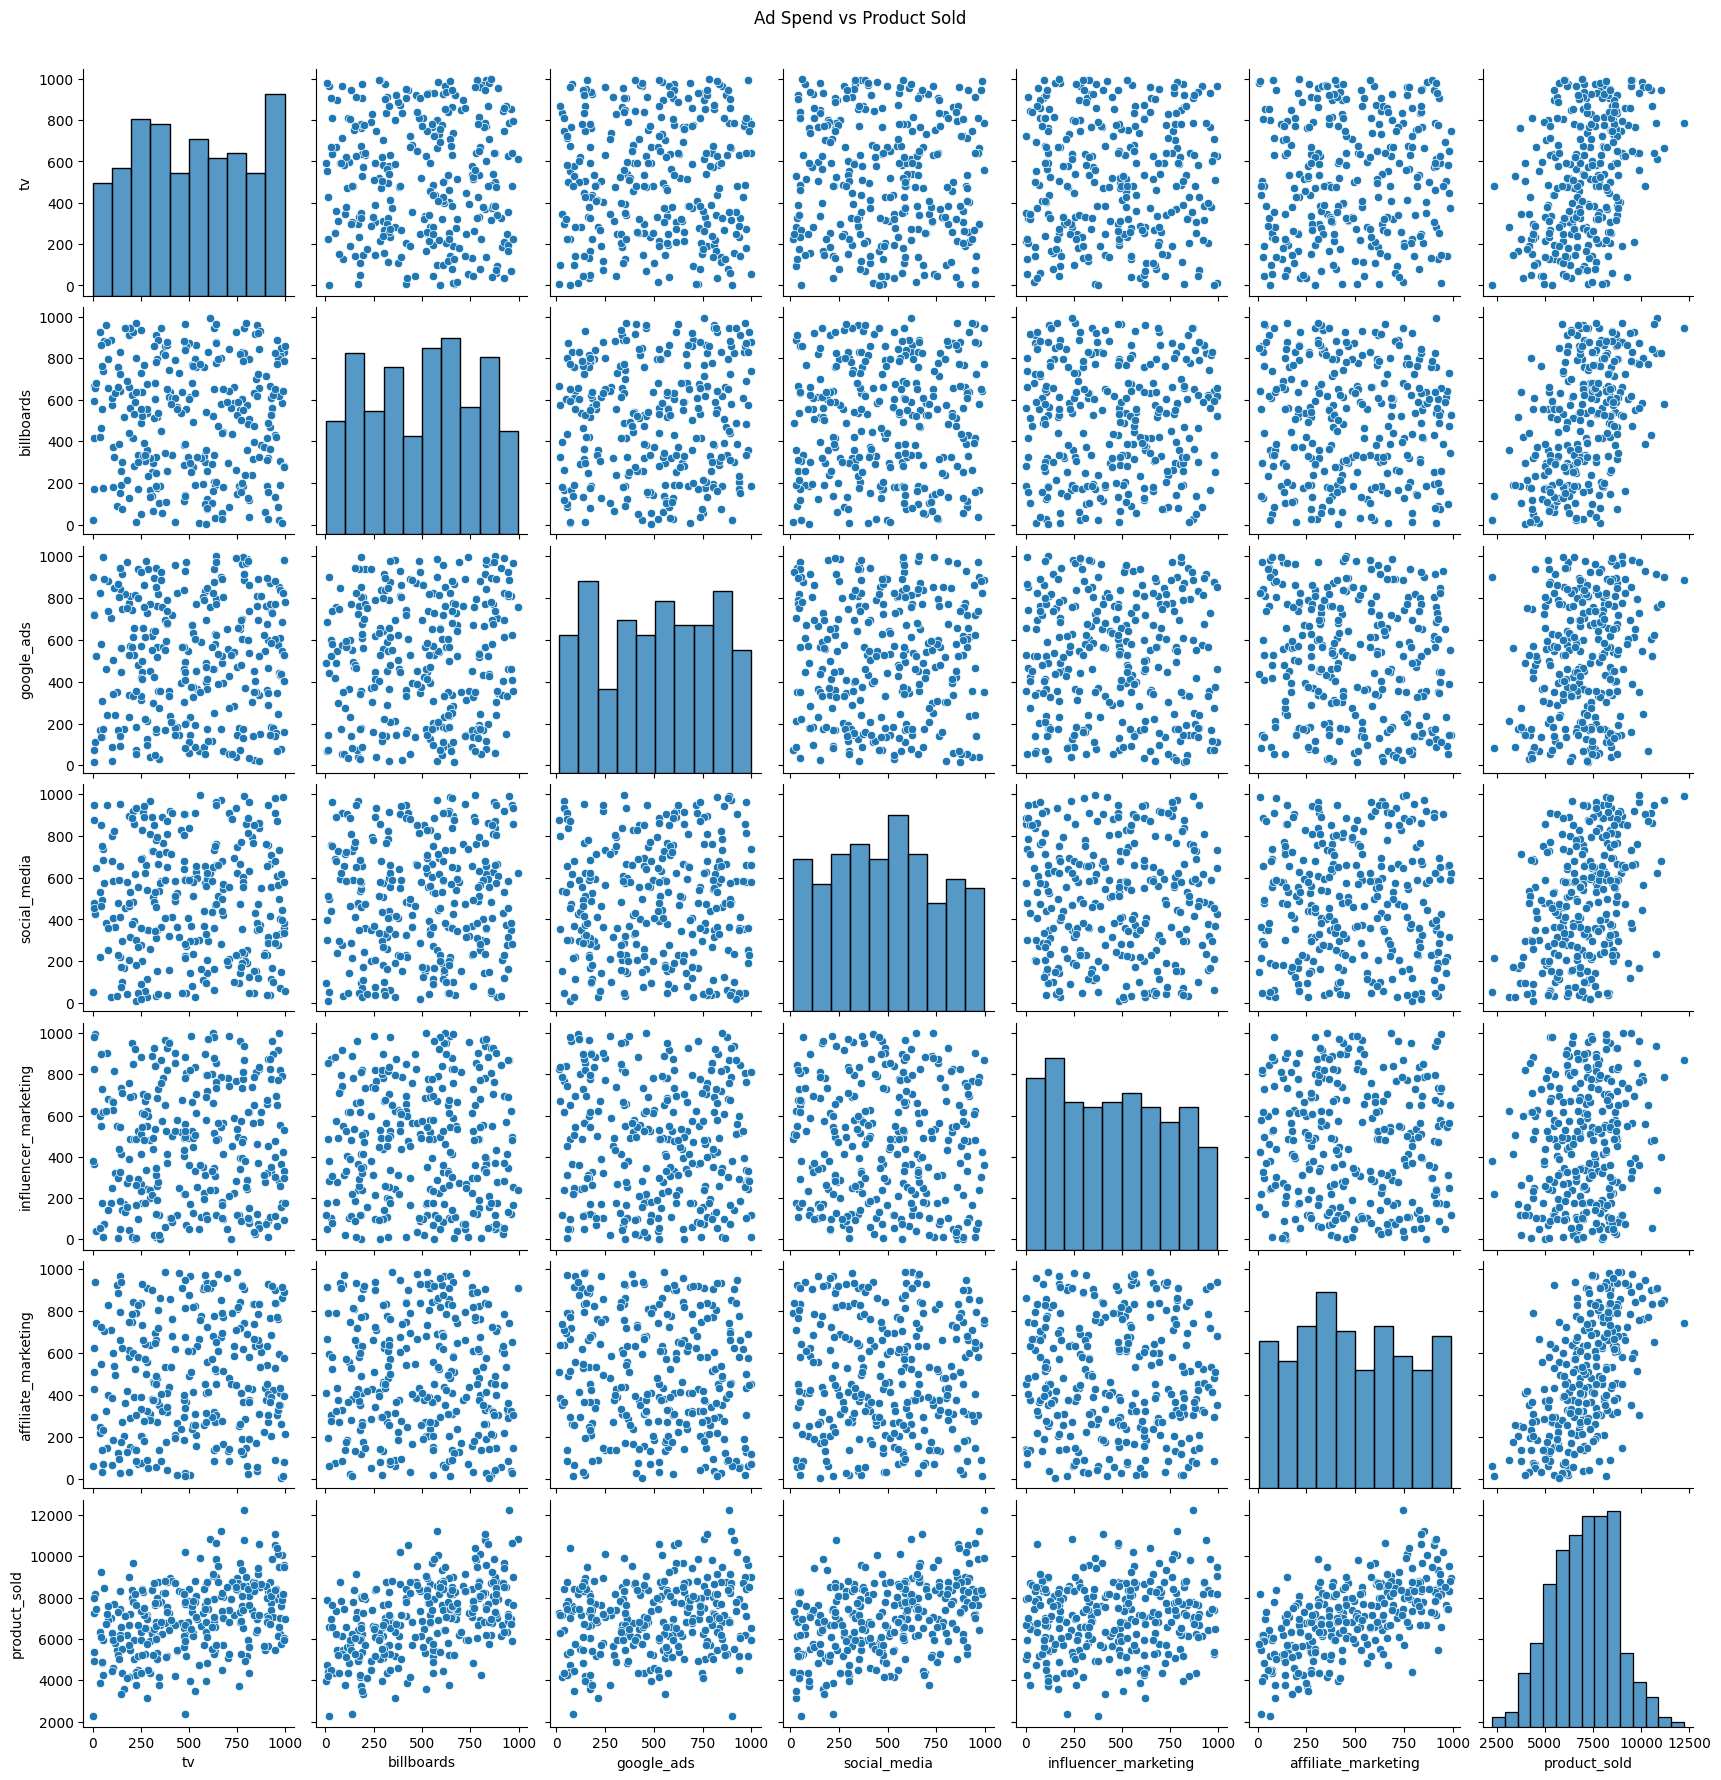

In [14]:
sns.pairplot(df[ad_channels + ['product_sold']])
plt.suptitle("Ad Spend vs Product Sold", y=1.02)
plt.show()

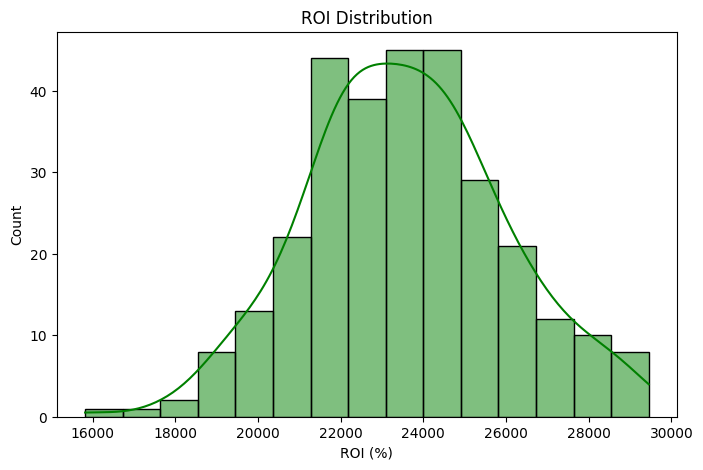

In [15]:
plt.figure(figsize=(8,5))
sns.histplot(df['roi'], kde=True, color='green')
plt.title("ROI Distribution")
plt.xlabel("ROI (%)")
plt.show()

In [16]:
X = df[ad_channels]
y = df['product_sold']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [17]:
y_pred = model.predict(X_test)
print("R² Score:", r2_score(y_test, y_pred))

R² Score: 0.9999736866138691


In [18]:
coef_df = pd.DataFrame({
    'Channel': X.columns,
    'Coefficient': model.coef_
})
print(coef_df)

                Channel  Coefficient
0                    tv     2.001823
1            billboards     2.998532
2            google_ads     1.498071
3          social_media     2.499797
4  influencer_marketing     1.199659
5   affiliate_marketing     3.996625


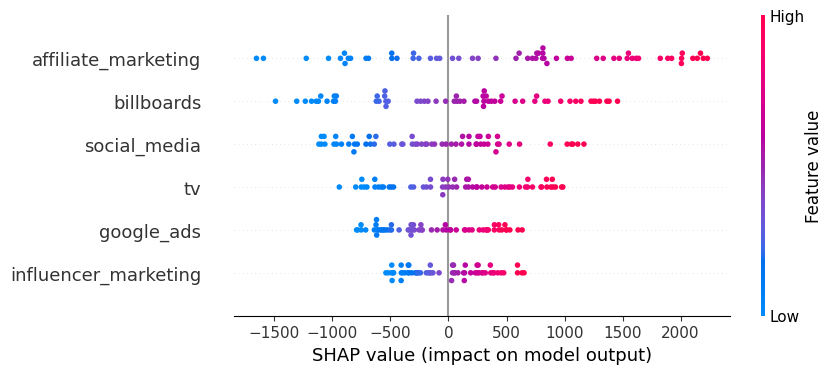

In [19]:
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

shap.plots.beeswarm(shap_values)

In [21]:
import ipywidgets as widgets
from IPython.display import display

channel_dropdown = widgets.Dropdown(
    options=ad_channels,
    description='Ad Channel:',
    value='tv'
)

def show_filtered_data(channel):
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=channel, y='product_sold', data=df)
    plt.title(f'{channel.capitalize()} Spend vs Product Sold')
    plt.xlabel(f'{channel.capitalize()} Spend')
    plt.ylabel('Products Sold')
    plt.grid(True)
    plt.show()

widgets.interact(show_filtered_data, channel=channel_dropdown);


interactive(children=(Dropdown(description='Ad Channel:', options=('tv', 'billboards', 'google_ads', 'social_m…

In [23]:
from IPython.display import Markdown

recommendations = """
### Strategic Recommendations

1. Increase budget on Google Ads & Social Media – Strong positive impact on product sales, as seen in regression and SHAP analysis.
2. Reduce billboards spend – Low ROI and weak correlation with sales.
3. Influencer & Affiliate Marketing – Perform better at mid-level spending; consider A/B testing scaled-up budgets.
4. Monitor ROI regularly – Use calculated ROI to identify diminishing returns.
5. Use explainable ML – SHAP values help understand where budget is working best.

"""

display(Markdown(recommendations))



### Strategic Recommendations

1. Increase budget on Google Ads & Social Media – Strong positive impact on product sales, as seen in regression and SHAP analysis.
2. Reduce billboards spend – Low ROI and weak correlation with sales.
3. Influencer & Affiliate Marketing – Perform better at mid-level spending; consider A/B testing scaled-up budgets.
4. Monitor ROI regularly – Use calculated ROI to identify diminishing returns.
5. Use explainable ML – SHAP values help understand where budget is working best.

